# Linear regression

Linear regression is a statistical approach to model the relationship between the dependent variable and one ore more independent variables.

Example (see picture). Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

<img src="linearRegression.png" />

Linear regression is a simple algorithm that we use to illustrate many widely used machine learning (ML) concepts. The picture below shows these concepts. This allows you to get familiar with these concepts before looking at more advanced ML algorithms. This workshop is based on Andrew Ng’s Machine Learning Coursera course. While watching the videos, make notes of the parts that you don’t understand. We’ll discuss these in class. 

<img src="mindmap.jpg" />

Hands-on activities in this workshop:
* linear univariate regression using python/numpy
* linear multivariate regression using python/numpy
* linear univariate regression using keras
* linear regression in practice


##	Univariate linear regression

Watch [Linear regression with one variable: model representation](https://www.youtube.com/watch?v=kHwlB_j7Hkc) (8 min). Check that you’ve understood the following statements:
* Machine learning: computer learns without being explicitly programmed
* Goals of this class: learn ML tools, but also learn how/when to apply the ML tools (use your time efficiently)
* Supervised learning: for each data sample, the correct answer is given; we’re teaching the computer
* Regression: predict real-value output (as opposed to predicting a category)
* Univariate regression: regression with one input variable
* $x$: input variable (aka feature)
* $y$: output variable
* $h$: hypothesis (also called model), a function that maps input to output, $h\colon x\to y$
* Initial choice of model for $h$ is a linear function: $h_\Theta(x) = \Theta_0 + \Theta_1 * x$
* $\Theta_0$ and $\Theta_1$ are called the **parameters** of the model; to fit the model to the data set, we’re going to determine the parameters $\Theta_0$ and $\Theta_1$
* Goal of machine learning: learn $h$ using a training set
* Don’t confuse linear function and linear regression (we'll come back to that later)

Watch [Linear regression with one variable: cost function](https://www.youtube.com/watch?v=yuH4iRcggMw) (8 min). Check that you’ve understood the following statements:
* squared error cost function:
<img src="squaredErrorCostFunction.png" />
* minimize the cost function:
<img src="minimizeCostFunction.png" />

Watch [Linear regression with one variable: cost function Intuition #1](https://www.youtube.com/watch?v=yR2ipCoFvNo) (11 min).

Watch [Linear regression with one variable: cost function Intuition #2](https://www.youtube.com/watch?v=0kns1gXLYg4) (8 min). Check that you’ve understood the following statements:
* Graph of cost function as a function of $\Theta_0$ and $\Theta_1$ 
  <img src="costFunctionGraph.png" alt="drawing" width="400"/>
* Contour plot to visualize a cost function as function of two parameters $\Theta_0$ and $\Theta_1$
* ML: have an efficient algorithm to minimize cost function $J(\Theta_0, \Theta_1)$


## Parameter learning

Watch [Linear regression with one variable: gradient descent](https://www.youtube.com/watch?v=F6GSRDoB-Cg) (11 min). Check that you’ve understood the following statements:
* Gradient descent algorithm for learning
  <img src="gradientDescentGraph.png" alt="drawing" width="400"/>
* Using gradient descent, you can end up in a local minimum
* Learning rate $\alpha$
* Simultaneous update of $\Theta_0$ and $\Theta_1$

Watch [Linear regression with one variable: gradient descent intuition](https://www.youtube.com/watch?v=YovTqTY-PYY) (11 min). Check that you’ve understood the following statements:
* Too small learning rate $\alpha$: slow learning; too large learning rate $\alpha$: overshoot minimum, possible leading to divergence
* Gradient descent can converge to a local minimum, even if the learning rate is fixed. Because closer to the minimum the slope gets less, so gradient descent will automatically take smaller steps.

Watch [Linear regression with one variable: gradient descent for linear regression](https://www.youtube.com/watch?v=GtSf2T6Co80) (10 min). Check that you’ve understood the following statements:
* Cost function for linear regression is convex: no danger for ending up in a local minimum
* Batch gradient descent: each step of gradient descent uses all training examples
* ML is iterative; you can also use an analytic (numerical) approach, so without learning. Gradient descent works more efficiently for large data sets.


## Linear algebra

Watch [Linear algebra: matrices and vectors](https://www.youtube.com/watch?v=Dft1cqjwlXE) (8 min).

Watch [Linear algebra: addition and scalar multiplication](https://www.youtube.com/watch?v=4WP6jVGIn7M) (6 min).

Watch [Linear algebra: matrix vector multiplication](https://www.youtube.com/watch?v=gPegoVYp64w) (13 min). Check that you’ve understood the following statements:
* Python programming: avoid for-loops and use vectorization instead, as it is shorter, clearer and faster

Watch [Linear algebra: matrix-matrix multiplication](https://www.youtube.com/watch?v=_lrHXJRukMw) (11 min)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# read the training set
data = pd.read_csv("ex1data1.txt", header=None)  # read from dataset into Pandas DataFrame variable
data.head()  # view first few rows of the data
X = data.iloc[:, 0]  # read first column; upper case for matrix
y = data.iloc[:, 1]  # read second column; lower case for vector
m = len(y)  # number of training samples; lower case for scalar

# Hands-on 1: Univariate linear regression using Python/Numpy

**Installation of python:**
* You can install python from https://www.python.org/downloads/, but it is better to use the anaconda distribution https://www.anaconda.com/distribution/, because you’ll get all the necessary libraries pre-installed. 
* Anaconda also installs Jupyter Notebook. This is a web-based interactive environment that we will use.
* If you get an error “HTPPS ...”, install OpenSSL version 1.1.1c 64-bit and reboot.
* Alternatively, you can use a Jetbrains PyCharm, a well-known Python IDE.

Nice quickstart to the mathematical python library numpy: https://docs.scipy.org/doc/numpy/user/quickstart.html

**Case description:**

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file [ex1data1.txt](https://bitbucket.org/ercoargante/machinelearningcoursera/raw/3e715b8f5577e4f364dfd377e593d874a85d8d83/ex1/ex1data1.txt) contains the dataset for our linear regression problem in csv-format. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. Save the file to the folder where thisJupyter notebook resides.

The following code shows how to load the dataset into a Pandas DataFrame.

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population).

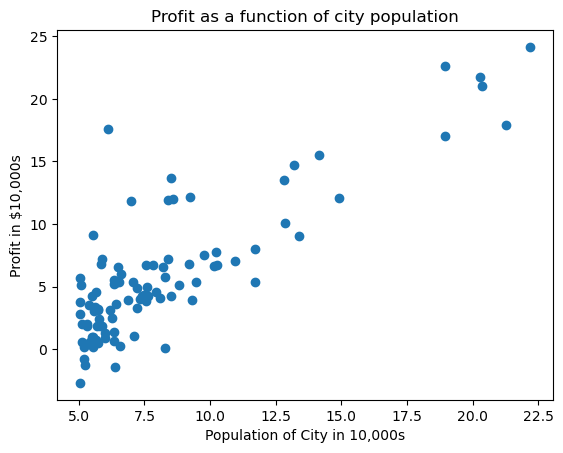

In [2]:
# visualize the training set using the matplotlib library
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit as a function of city population')
plt.show()  # show the plot when preparation of the graph is ready

Python is a dynamically-typed language, whereas Java and C# are statically typed. The following commands can be handy if you lost track of the type of a variable.

In [3]:
print(X.shape)  # shape of pandas dataframe or numpy ndarray (n-dimensional array)
type(X)  # python built-in function

(97,)


pandas.core.series.Series

We add an additional first column to X and set it to all ones. This allows us to treat $\Theta_0$ as simply another 'feature'.

In [4]:
# prepare the training set
X = X.to_numpy()[:, np.newaxis]  # convert from shape (97,) to (97,1), so from vector to matrix
y = y.to_numpy()[:, np.newaxis]  # convert from shape (97,) to (97,1), so from vector to matrix
ones = np.ones((m, 1))  # matrix of shape (97,1) with only 1's
X = np.hstack((ones, X))  # adding the x_0 column, so shape will be (97,2)

Python is an interpreted programming language, in contrast to compiled programming languages like Java or C++. An interpreted programming language means that a line of source code is directly executed when it is read by the python interpreter. This means that you can rerun an individual cell of this Jupyter notebook, which is very convenient.

However, realize that statements that assign a variable to itself, keep on having an effect. The only way out is to restart the kernel and rerun the complete Jupyter notebook. Examples of a statements that assign a variable to itself can be seem in the four lines of source code, just above. For example, every time you rerun ```X = np.hstack((ones, X))``` a column of ones is prepended to the front of the matrix X.

In [5]:
print(X.shape)  # shape of pandas dataframe or numpy ndarray (n-dimensional array)
type(X)  # python built-in function

(97, 2)


numpy.ndarray

**Exercise**: provide the body of the function $h_\Theta(x)$. Remember that the hypothesis $h$ is a linear function: $h_\Theta(x) = \Theta_0 + \Theta_1 * x$. We've added a column of ones to $X$, meaning that we can express the hypothesis $h$ to be: $h_\Theta(x) = \Theta_0 * x_0 + \Theta_1 * x_1$. This means that $h$ is the dot product of $X$ and $\Theta$.


Matrix $X$ has shape (97, 2). Vector $\Theta$ has shape (2, 1). Vector $h$ should have shape (97, 1). Use numpy dot product to calculate $h$ and return it as the function result.

In [6]:
# hypothesis (also called model)
def h(X, theta):  # this is the way to define a function in python
    # your code
    return X @ theta

**Exercise**: provide the body of the cost function $J(\Theta)$ according to the mathematical formula in the picture just below. Note that $J(\Theta)$ is a scalar. What you should do:
* calculate $h_\Theta(x)$ using the previously defined function and store it in a variable ```hyp```. Vector ```hyp``` has shape (97, 1). 
* calculate the squared error vector, also of shape (97, 1). 
* use ```np.sum``` to perform the summation, which yields a scalar. Multiply by ```1/(2 * m)```. Return this as the function result.

<img src=squaredErrorCostFunction.png />

In [7]:
# cost function
def J(X, y, theta):
    # your code
    hyp = h(X, theta)
    sqrd_err = (hyp - y)**2
    m = len(y)
    return 1/(2 * m) * np.sum(sqrd_err)

**Exercise**: provide the body of the gradient according to the mathematical formula in the picture just below. Note that we use $h_\Theta(x) = \Theta_0 * x_0 + \Theta_1 * x_1$, where $x_0$ always has the value $1$, to allow uniform handling of the terms. Also note that the gradient is a vector with the same dimensions as $\Theta$, so (2, 1) in this case. What you should do:
* calculate $h_\Theta(x)$ using the previously defined function and store it in a variable ```hyp```. Vector ```hyp``` has shape (97, 1). 
* calculate the dot product of ```X.transpose()``` and ```hyp - y```, multiply by ```1/m```, and return this as the function result.

<img src=gradientDescentAlgorithm2.png />

In [8]:
# gradient
def grad(X, y, theta):
    # your code
    hyp = h(X, theta)
    return 1/m * X.transpose().dot(hyp - y)

In [9]:
# freehand test the cost function and gradient
theta = np.zeros([2, 1])  # initialize theta
print("cost function: " + str(J(X, y, theta)))  # should give 32.072733877455676
np.testing.assert_array_almost_equal_nulp(J(X, y, theta), 32.072733877455676)
print(grad(X, y, theta))  # should give [[-5.83913505154639] [-65.32884974555672]]
np.testing.assert_array_almost_equal_nulp(grad(X, y, theta), [[-5.83913505154639], [-65.32884974555672]])

cost function: 32.072733877455676
[[ -5.83913505]
 [-65.32884975]]


**Exercise**: now we're going to implement the learning algorithm to learn the parameter $\Theta$:
<img src="gradientDescentAlgorithm.png" />
* create an empty list: ```J_history = []``` (not needed for the algorithm itself, but only needed to see how $J(\Theta)$ evolves during learning).
* create a for-loop for the number of iterations
* calculate the gradient
* update $\Theta$ using the calculated gradient and learning rate $\alpha$
* add the cost to the history: ```J_history.append(J(X, y, theta))```
* not that python allows to return multiple results: ```return theta, J_history```

In [10]:
# learning algorithm
def gradientDescent(X, y, theta, alpha, num_iters):
    # your code
    J_history = []
    for n in range(num_iters):
        theta -= alpha * grad(X, y, theta)
        J_history.append(J(X, y, theta))
    return theta, J_history

Before running the learning algorithm, let's first investigate the cost function by plotting it as surface plot and as contour plot. 

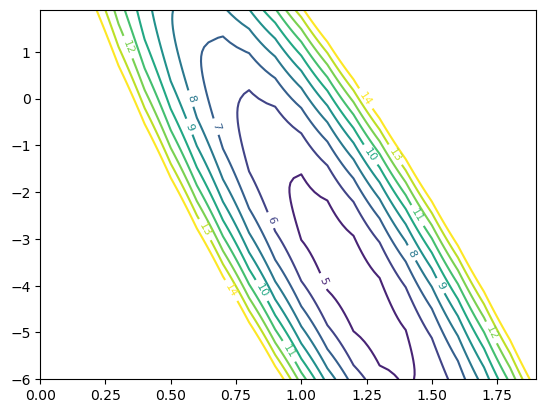

In [11]:
# investigating the cost function: contour plot
theta_0_vals = np.arange(-6.0, 2.0, 0.1)
theta_1_vals = np.arange(0.0, 2.0, 0.1)
J_vals = [ J(X, y, [[i],[j]]) for i in theta_0_vals for j in theta_1_vals ]
J_vals = np.array(J_vals)
J_vals = np.reshape(J_vals, (len(theta_0_vals), len(theta_1_vals)))
cs = plt.contour(theta_1_vals, theta_0_vals, J_vals, np.arange(4, 15, 1))
plt.clabel(cs, inline=1, fontsize=8)
plt.show()

The contour plot shows that the cost function is concave and consequently has only one minimum. No risk of getting stuck in a local minimum.

theta: [[-3.63029144]
 [ 1.16636235]], J(X, y, theta): 4.483388256587725


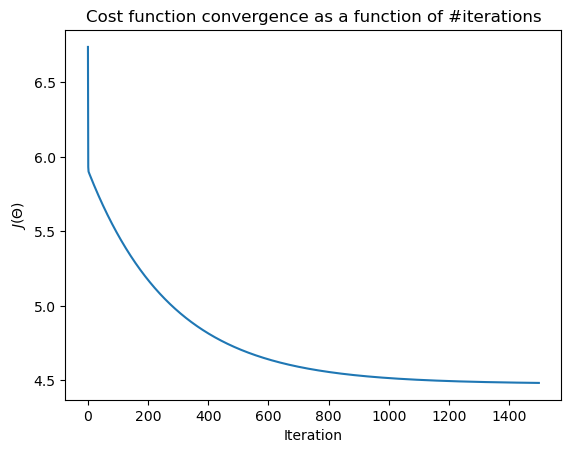

In [12]:
# perform learning
num_iters = 1500 # hyper parameter number of iterations
alpha = 0.01  # hyper parameter learning rate
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
print("theta: " + str(theta) + ", J(X, y, theta): " + str(J(X, y, theta)))  # theta should be [[-3.63029143940436], [1.166362350335582]
np.testing.assert_array_almost_equal_nulp(theta, [[-3.63029143940436], [1.166362350335582]])
    
# plot cost function as a function of #iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function convergence as a function of #iterations")
plt.show()

# Note that the values of $\Theta$ where $J(\Theta)$ is minimal corresponds with the contour plot.

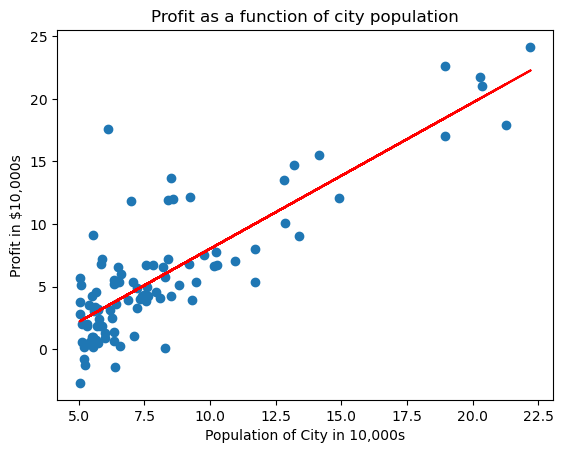

In [13]:
# visualize how the learned model fits the training data
plt.scatter(X[:,1], y)
plt.plot(X[:,1], h(X, theta), color="r")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit as a function of city population')
plt.show()

**Exercise**: now that we've learned the model, let's use it! Calculate the expected profit for a town of 35000 people (3.5 as it is in units of 10000 people). This can be done by passing ```np.array([1, 3.5])``` to $h_\Theta(x)$, where the ```1``` is for $\Theta_0$. This should give 4519.7678677017675 dollar. Calculate the expected profit for a town of 70000 people. This should give 45342.45012944714 dollar.

In [14]:
###### use the result of learning to predict profit
# your code
predict1 = h(np.array([1, 3.5]), theta) * 10000  # 35000 people
print("For population = 35000, we predict a profit of " + str(predict1) + " dollar")  # should give 4519.7678677017675 dollar
    
predict2 = h(np.array([1, 7]), theta) * 10000  # 70000 people
print("For population = 70000, we predict a profit of " + str(predict2) + " dollar")  # should give 45342.45012944714 dollar


For population = 35000, we predict a profit of [4519.7678677] dollar
For population = 70000, we predict a profit of [45342.45012945] dollar


Please don’t look at it yet, but the Jupyter notebook with the solution is also available. 